In [262]:
import numpy as np
import pandas as pd

from trackml.dataset import load_event
# from trackml.randomize import shuffle_hits
from trackml.score import score_event

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import sys
sys.path.insert(0, '../common')
from utils import get_features

from tqdm import tqdm

import matplotlib.pyplot as plt

import seaborn as sns
# import warnings
# warnings.filterwarnings(action='ignore')

In [2]:
event = '../ipynb/input/train_1/event000001000'

In [23]:
hits, truth, particles = load_event(event, parts=['hits', 'truth', 'particles'])

In [4]:
hits = get_features(hits)

(120939, 2)


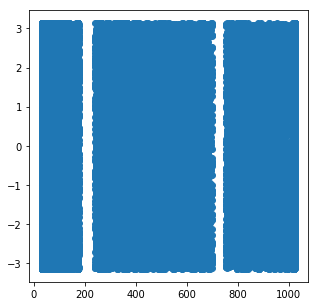

In [20]:
fig = plt.figure(figsize=(5, 5))
#ax1 = fig.add_subplot(111, projection='polar')
ax1 = fig.add_subplot(111)
np_input = hits[['phi', 'r2']].values
print(np_input.shape)
ax1.scatter(np_input[:, 1], np_input[:, 0])

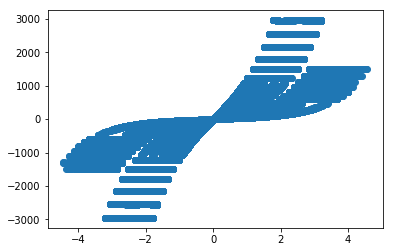

In [53]:
hits_t3 = hits.copy()
hits_t3['particle_id'], scores3 = recursive_fit_in_eta_phi(hits_t3, nruns=400, truth=truth)




  0%|          | 0/400 [00:00<?, ?it/s]


  0%|          | 1/400 [00:02<16:40,  2.51s/it]


  0%|          | 2/400 [00:05<16:56,  2.55s/it]


  1%|          | 3/400 [00:07<17:26,  2.64s/it]


  1%|          | 4/400 [00:10<17:23,  2.63s/it]


  1%|▏         | 5/400 [00:13<17:24,  2.64s/it]


  2%|▏         | 6/400 [00:15<17:17,  2.63s/it]


  2%|▏         | 7/400 [00:18<17:16,  2.64s/it]


  2%|▏         | 8/400 [00:21<17:09,  2.63s/it]


  2%|▏         | 9/400 [00:23<17:04,  2.62s/it]


  2%|▎         | 10/400 [00:26<16:56,  2.61s/it]


  3%|▎         | 11/400 [00:28<16:57,  2.61s/it]


  3%|▎         | 12/400 [00:31<16:50,  2.60s/it]


  3%|▎         | 13/400 [00:34<16:52,  2.62s/it]


  4%|▎         | 14/400 [00:36<16:44,  2.60s/it]


  4%|▍         | 15/400 [00:38<16:40,  2.60s/it]


  4%|▍         | 16/400 [00:41<16:33,  2.59s/it]


  4%|▍         | 17/400 [00:43<16:29,  2.58s/it]


  4%|▍         | 18/400 [00:46<16:25,  2.58s/it]


  5%|▍         | 19/400 [00:49<16:23,  2.58s/i

 34%|███▍      | 136/400 [05:14<10:10,  2.31s/it]


 34%|███▍      | 137/400 [05:16<10:08,  2.31s/it]


 34%|███▍      | 138/400 [05:19<10:06,  2.31s/it]


 35%|███▍      | 139/400 [05:21<10:03,  2.31s/it]


 35%|███▌      | 140/400 [05:23<10:01,  2.31s/it]


 35%|███▌      | 141/400 [05:25<09:58,  2.31s/it]


 36%|███▌      | 142/400 [05:28<09:56,  2.31s/it]


 36%|███▌      | 143/400 [05:30<09:53,  2.31s/it]


 36%|███▌      | 144/400 [05:32<09:51,  2.31s/it]


 36%|███▋      | 145/400 [05:34<09:48,  2.31s/it]


 36%|███▋      | 146/400 [05:36<09:46,  2.31s/it]


 37%|███▋      | 147/400 [05:39<09:44,  2.31s/it]


 37%|███▋      | 148/400 [05:41<09:41,  2.31s/it]


 37%|███▋      | 149/400 [05:44<09:39,  2.31s/it]


 38%|███▊      | 150/400 [05:46<09:37,  2.31s/it]


 38%|███▊      | 151/400 [05:48<09:35,  2.31s/it]


 38%|███▊      | 152/400 [05:50<09:32,  2.31s/it]


 38%|███▊      | 153/400 [05:52<09:29,  2.31s/it]


 38%|███▊      | 154/400 [05:55<09:27,  2.31s/it]


 39%|███▉   

 68%|██████▊   | 270/400 [10:19<04:58,  2.30s/it]


 68%|██████▊   | 271/400 [10:22<04:56,  2.30s/it]


 68%|██████▊   | 272/400 [10:24<04:53,  2.30s/it]


 68%|██████▊   | 273/400 [10:26<04:51,  2.30s/it]


 68%|██████▊   | 274/400 [10:29<04:49,  2.30s/it]


 69%|██████▉   | 275/400 [10:31<04:47,  2.30s/it]


 69%|██████▉   | 276/400 [10:34<04:44,  2.30s/it]


 69%|██████▉   | 277/400 [10:36<04:42,  2.30s/it]


 70%|██████▉   | 278/400 [10:38<04:40,  2.30s/it]


 70%|██████▉   | 279/400 [10:40<04:37,  2.30s/it]


 70%|███████   | 280/400 [10:43<04:35,  2.30s/it]


 70%|███████   | 281/400 [10:45<04:33,  2.30s/it]


 70%|███████   | 282/400 [10:47<04:31,  2.30s/it]


 71%|███████   | 283/400 [10:50<04:28,  2.30s/it]


 71%|███████   | 284/400 [10:52<04:26,  2.30s/it]


 71%|███████▏  | 285/400 [10:55<04:24,  2.30s/it]


 72%|███████▏  | 286/400 [10:57<04:22,  2.30s/it]


 72%|███████▏  | 287/400 [10:59<04:19,  2.30s/it]


 72%|███████▏  | 288/400 [11:02<04:17,  2.30s/it]


 72%|███████

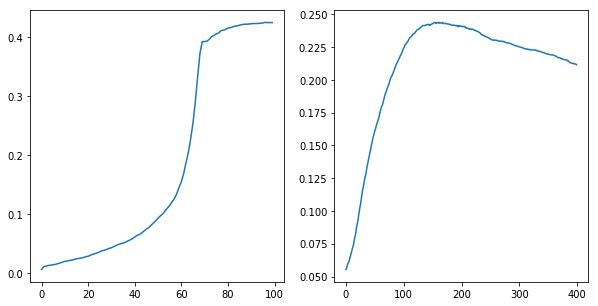

In [54]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(scores)
ax2 = fig.add_subplot(122)
ax2.plot(scores3)

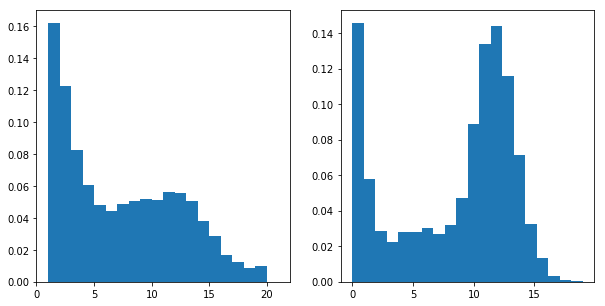

In [57]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
res = ax1.hist(hits_t2['N1'], bins=20, density=True)
ax2 = fig.add_subplot(122)
res = ax2.hist(particles['nhits'], bins=20, density=True)

In [59]:
from utils import view

In [67]:
hits_t2[hits_t2['particle_id'] == 5962517]

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,...,absZ,z1,phi1,x1,y1,s1,N1,s2,N2,particle_id
1201,1202,-50.340099,66.118797,-1498.0,7,2,90,-0.033553,0.044070,-18.026199,...,1498.0,-18.026199,2.655947,-0.884374,0.466779,5962517,17,911,2,5962517
1262,1263,-50.474899,66.296898,-1502.0,7,2,93,-0.033554,0.044071,-18.025883,...,1502.0,-18.025883,2.657100,-0.884911,0.465760,5962517,17,911,2,5962517
2918,2919,-43.471100,57.397701,-1298.0,7,4,90,-0.033439,0.044152,-18.027372,...,1298.0,-18.027372,2.595415,-0.854516,0.519424,5962517,17,2143,2,5962517
2983,2984,-43.614498,57.571602,-1302.0,7,4,93,-0.033447,0.044150,-18.026545,...,1302.0,-18.026545,2.596704,-0.855185,0.518323,5962517,17,2143,2,5962517
5046,5047,-36.615299,48.602501,-1098.0,7,6,90,-0.033296,0.044197,-18.043980,...,1098.0,-18.043980,2.534866,-0.821519,0.570182,5962517,17,3549,2,5962517
5101,5102,-36.761501,48.777802,-1102.0,7,6,93,-0.033308,0.044195,-18.042116,...,1102.0,-18.042116,2.536211,-0.822285,0.569076,5962517,17,3549,2,5962517
7546,7547,-31.834700,42.428001,-958.0,7,8,90,-0.033180,0.044220,-18.060741,...,958.0,-18.060741,2.492324,-0.796526,0.604604,5962517,17,5107,2,5962517
7603,7604,-31.992901,42.578602,-962.0,7,8,93,-0.033206,0.044193,-18.062796,...,962.0,-18.062796,2.494163,-0.797637,0.603138,5962517,17,5107,2,5962517
10374,10375,-27.096701,36.227299,-818.0,7,10,90,-0.033075,0.044220,-18.081385,...,818.0,-18.081385,2.450213,-0.770367,0.637601,5962517,17,6774,7,5962517
10377,10378,-26.955601,36.379799,-818.0,7,10,90,-0.032903,0.044406,-18.066183,...,818.0,-18.066183,2.445700,-0.767482,0.641071,5962517,17,6774,7,5962517


In [69]:
hits_t2[hits_t2['particle_id'] == 3213232]

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,...,absZ,z1,phi1,x1,y1,s1,N1,s2,N2,particle_id
22889,22890,-0.588186,31.522499,5.822370,8,2,124,-0.018346,0.983201,0.184673,...,5.822370,0.184673,1.591142,-0.020344,0.999793,3213232,16,15161,15,3213232
23081,23082,-0.630204,33.085300,6.192420,8,2,125,-0.018719,0.982759,0.187131,...,6.192420,0.187131,1.591638,-0.020840,0.999783,3213232,16,15161,15,3213232
30408,30409,-1.611190,72.720802,15.486100,8,4,249,-0.021665,0.977839,0.212901,...,15.486100,0.212901,1.597440,-0.026640,0.999645,3213232,16,21014,1,3213232
30436,30437,-1.640780,72.713600,12.112300,8,4,249,-0.022253,0.986164,0.166533,...,12.112300,0.166533,1.596870,-0.026071,0.999660,3213232,16,15161,15,3213232
30440,30441,-1.682770,72.703400,8.487240,8,4,249,-0.022983,0.992993,0.116707,...,8.487240,0.116707,1.596399,-0.025600,0.999672,3213232,16,15161,15,3213232
37202,37203,-3.025150,116.344002,19.557400,8,6,404,-0.025634,0.985840,0.168043,...,19.557400,0.168043,1.602464,-0.031662,0.999499,3213232,16,26130,2,3213232
37209,37210,-2.945360,116.360001,25.722300,8,6,404,-0.024708,0.976129,0.220987,...,25.722300,0.220987,1.603563,-0.032761,0.999463,3213232,16,26135,1,3213232
43504,43505,-5.028220,171.041000,38.557201,8,8,605,-0.028666,0.975120,0.225329,...,38.557201,0.225329,1.611367,-0.040560,0.999177,3213232,16,15172,6,3213232
75469,75470,-9.199890,256.910004,59.200001,13,2,471,-0.034874,0.973871,0.230283,...,59.200001,0.230283,1.623759,-0.052938,0.998598,3213232,16,15242,3,3213232
82344,82345,-15.571200,357.509003,82.000000,13,4,659,-0.042414,0.973813,0.229148,...,82.000000,0.229148,1.638103,-0.067256,0.997736,3213232,16,56067,1,3213232


In [83]:
hits_t2[ (hits_t2['N1'] < 5) & (hits_t2['N1'] > 2) ].head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,...,absZ,z1,phi1,x1,y1,s1,N1,s2,N2,particle_id
48,49,-108.177002,-20.438000,-1502.0,7,2,5,-0.071829,-0.013571,-13.643289,...,1502.0,-13.643289,-2.519283,-0.812534,-0.582914,5501882,3,44,1,5501882
85,86,-149.350998,-54.144402,-1498.0,7,2,7,-0.099144,-0.035943,-9.429531,...,1498.0,-9.429531,-2.359378,-0.709354,-0.704852,5425453,3,75,1,5425453
144,145,-120.008003,-80.964798,-1502.0,7,2,11,-0.079530,-0.053656,-10.375359,...,1502.0,-10.375359,-2.112495,-0.515593,-0.856834,7422204,3,119,1,7422204
201,202,-82.203300,-71.607101,-1502.0,7,2,15,-0.054586,-0.047549,-13.777520,...,1502.0,-13.777520,-1.989397,-0.406483,-0.913658,5425537,3,159,1,5425537
274,275,-44.459000,-139.964005,-1498.0,7,2,22,-0.029537,-0.092988,-10.200506,...,1498.0,-10.200506,-1.443942,0.126514,-0.991965,1179585,3,221,1,1179585


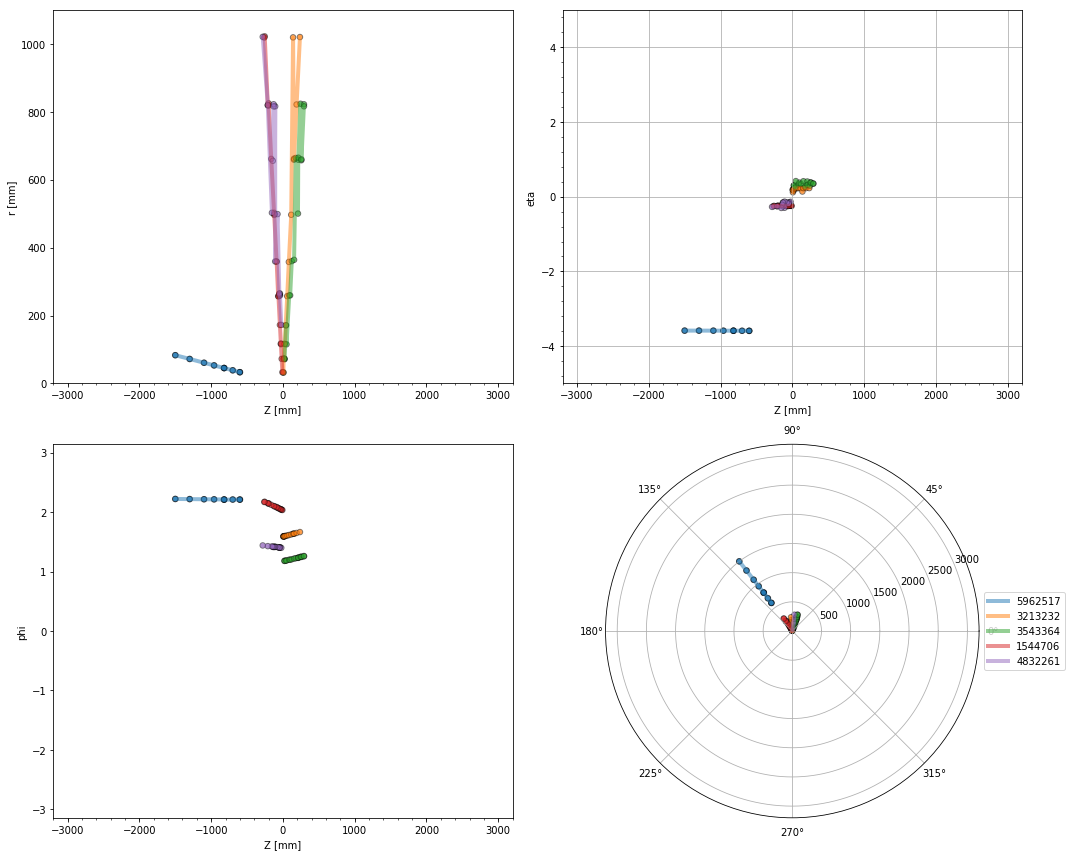

In [66]:
res = view(hits_t2[hits_t2['N1'] > 15], hits_t2[hits_t2['N1'] > 15]['particle_id'], numb=5)

In [75]:
apply_rnn(hits_t2[hits_t2['particle_id'] == 3213232][['x', 'y', 'z']])

0.5657902956008911

In [273]:
rnn_df = hits_t2.groupby('s1')[['x', 'y', 'z']].aggregate(apply_rnn)
rnn_df['rnn_s1'] = rnn_df['x']
rnn_df = rnn_df.reset_index()
new_hit = pd.merge(hits_t2, rnn_df, on='s1').sort_values(by='hit_id').set_index('hit_id').reset_index()
hits_t2['rnn'] = new_hit['rnn_s1']

/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


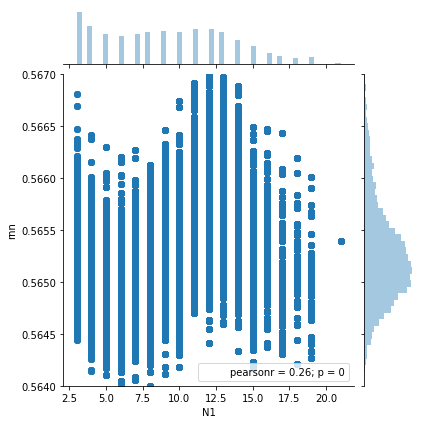

In [277]:
new_hits = hits_t2[hits_t2['rnn'] > 0.]
sns.jointplot(new_hits['N1'], new_hits['rnn'], ylim=(0.564, 0.567))

In [340]:
hits_t4 = hits.copy()
hits_t4['particle_id'], scores4 = dbscan_rnn2(hits_t4, nruns=100, truth=truth)


















  0%|          | 0/100 [00:00<?, ?it/s]
















  1%|          | 1/100 [00:35<58:03, 35.19s/it]
















  2%|▏         | 2/100 [00:50<40:54, 25.04s/it]
















  3%|▎         | 3/100 [01:03<34:27, 21.32s/it]
















  4%|▍         | 4/100 [01:17<31:05, 19.44s/it]
















  5%|▌         | 5/100 [01:30<28:44, 18.16s/it]
















  6%|▌         | 6/100 [01:43<27:04, 17.29s/it]
















  7%|▋         | 7/100 [01:56<25:43, 16.60s/it]
















  8%|▊         | 8/100 [02:08<24:41, 16.10s/it]
















  9%|▉         | 9/100 [02:20<23:41, 15.62s/it]
















 10%|█         | 10/100 [02:32<22:55, 15.29s/it]
















 11%|█         | 11/100 [02:44<22:08, 14.93s/it]
















 12%|█▏        | 12/100 [02:55<21:26, 14.62s/it]
















 13%|█▎        | 13/100 [03:07<20:54, 14.42s/it]
















 14%|█▍        | 14/100 [03:18<20:20, 14.19s/it]
















 15%|█▌        | 15/100 [0

 70%|███████   | 70/100 [11:17<04:50,  9.68s/it]
















 71%|███████   | 71/100 [11:23<04:39,  9.63s/it]
















 72%|███████▏  | 72/100 [11:29<04:28,  9.58s/it]
















 73%|███████▎  | 73/100 [11:35<04:17,  9.53s/it]
















 74%|███████▍  | 74/100 [11:40<04:06,  9.47s/it]
















 75%|███████▌  | 75/100 [11:46<03:55,  9.42s/it]
















 76%|███████▌  | 76/100 [11:51<03:44,  9.36s/it]
















 77%|███████▋  | 77/100 [11:56<03:34,  9.31s/it]
















 78%|███████▊  | 78/100 [12:02<03:23,  9.26s/it]
















 79%|███████▉  | 79/100 [12:07<03:13,  9.21s/it]
















 80%|████████  | 80/100 [12:12<03:03,  9.16s/it]
















 81%|████████  | 81/100 [12:18<02:53,  9.11s/it]
















 82%|████████▏ | 82/100 [12:23<02:43,  9.06s/it]
















 83%|████████▎ | 83/100 [12:28<02:33,  9.02s/it]
















 84%|████████▍ | 84/100 [12:33<02:23,  8.97s/it]
















 85%|████████▌ | 85/100 [

In [336]:
(hits_t['N1'].values > 17) | (hits_t['N1'].values < 5)

array([ True, False,  True, ...,  True,  True,  True])

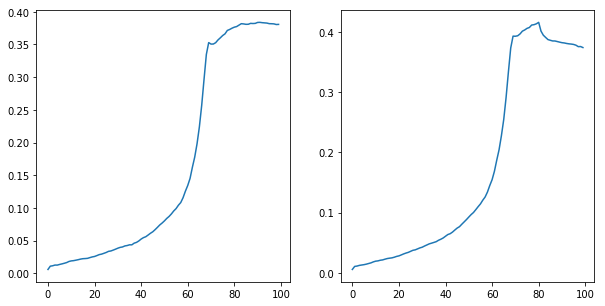

In [315]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(scores2)
ax2 = fig.add_subplot(122)
ax2.plot(scores4)

(array([19915., 15634., 10356.,  7748.,  5870.,  5610.,  5572.,  6016.,
         5922.,  5910.,  6699.,  6660.,  6006.,  4704.,  3165.,  2032.,
         1343.,   882.,   874.,    21.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <a list of 20 Patch objects>)

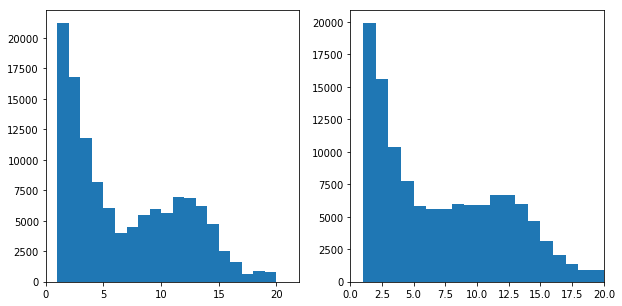

In [316]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.hist(hits_t['N1'], bins=20)
ax2 = fig.add_subplot(122)
ax2.set_xlim(0, 20)
ax2.hist(hits_t4['N1'], bins=20)

(array([   92.,  1624.,  9811., 24564., 25350., 13243.,  5809.,  3156.,
         1515.,   226.]),
 array([0.56375617, 0.56409832, 0.56444048, 0.56478263, 0.56512479,
        0.56546694, 0.56580909, 0.56615125, 0.5664934 , 0.56683556,
        0.56717771]),
 <a list of 10 Patch objects>)

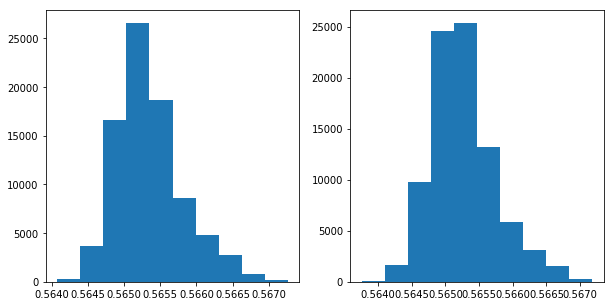

In [317]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.hist(hits_t[hits_t['rnn'] < 0.6]['rnn'])

ax2 = fig.add_subplot(122)
ax2.hist(hits_t4[hits_t4['rnn'] >0]['rnn'])

(120939, 26)


/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


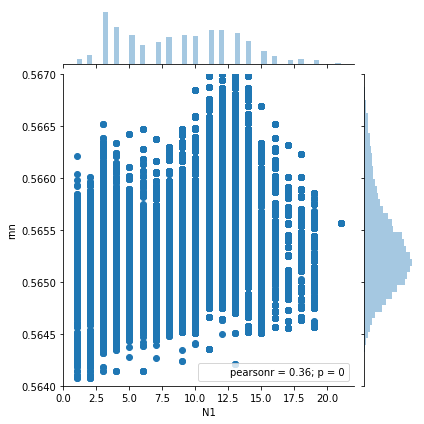

In [269]:
print(hits_t.shape)
new_hits = hits_t[hits_t['rnn'] < 0.6]
sns.jointplot(new_hits['N1'], new_hits['rnn'], ylim=(0.564, 0.567))

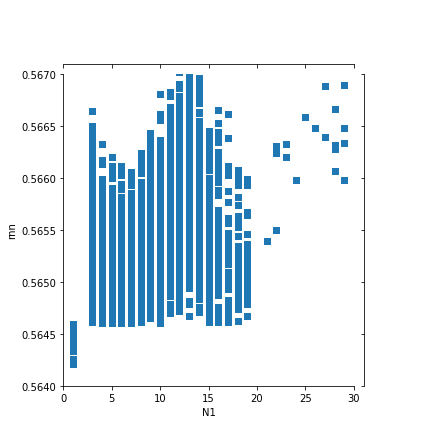

In [305]:
new_hits = hits_t4[hits_t4['rnn'] > 0]
g = sns.JointGrid(x='N1', y='rnn', data=new_hits, ylim=(0.564, 0.567), xlim=(0, 30))
#g = g.plot(sns.regplot, sns.distplot)
g = g.plot_joint(plt.scatter, marker='s')

In [50]:
def recursive_fit_in_eta_phi(dfh, nruns=400, truth=None):
    x = dfh.x.values
    y = dfh.y.values
    z = dfh.z.values

    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    rt = np.sqrt(x ** 2 + y ** 2)
    
    phi0 = np.arctan2(y, x)
    dfh['z1'] = z / rt

    # try a linear dependance of (eta, phi) on Z
    #dz0 = -0.00070
    #stepdz = 0.00001
    
    dz0 = 0
    stepdz = 0.000005


    stepeps = 0.000005
    mm = 1

    scores = []
    for ii in tqdm(range(nruns)):
        mm = mm * (-1)

        new_ii = ii
        dz = mm * (dz0 + new_ii * stepdz)

        # dfh['phi1'] = phi0 + dz * dfh['z'].values * np.sign(dfh['z'].values)
        dfh['phi1'] = phi0 - np.nan_to_num(np.arccos(mm*dz*rt))
        dfh['x1'] = np.cos(dfh['phi1'].values)
        dfh['y1'] = np.sin(dfh['phi1'].values)


        ss = StandardScaler()
        dfs = ss.fit_transform(dfh[['y1', 'x1', 'z1']].values)
        cx = np.array([1, 1, 0.75, 0.5, 0.5])
        for k in range(dfs.shape[1]):
            dfs[:, k] *= cx[k]

        clusters = DBSCAN(eps=0.0035 + ii * stepeps, min_samples=1, n_jobs=4).fit(dfs).labels_
        if ii == 0:
            dfh['s1'] = clusters
            dfh['N1'] = dfh.groupby('s1')['s1'].transform('count')
        else:
            dfh['s2'] = clusters
            dfh['N2'] = dfh.groupby('s2')['s2'].transform('count')
            maxs1 = dfh['s1'].max()
            cond = np.where((dfh['N2'].values > dfh['N1'].values) & (dfh['N2'].values < 25))
            s1 = dfh['s1'].values
            s1[cond] = dfh['s2'].values[cond] + maxs1
            dfh['s1'] = s1
            dfh['s1'] = dfh['s1'].astype('int64')
            dfh['N1'] = dfh.groupby('s1')['s1'].transform('count')

        sub = dfh[['hit_id', 's1']]
        sub.columns = ['hit_id', 'track_id']
        if truth is not None:
            scores.append(score_event(truth, sub))
        else:
            scores.append(0.)
        del sub

    return dfh['s1'].values, scores

In [270]:
def dbscan_rnn(dfh, nruns=400, truth=None, use_rnn=True):
    x = dfh.x.values
    y = dfh.y.values
    z = dfh.z.values

    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    rt = np.sqrt(x ** 2 + y ** 2)
    
    phi0 = np.arctan2(y, x)
    dfh['z1'] = z / rt

    # try a linear dependance of (eta, phi) on Z
    dz0 = -0.00070
    stepdz = 0.00001

    stepeps = 0.000005
    mm = 1

    scores = []
    for ii in tqdm(range(nruns)):
        mm = mm * (-1)

        new_ii = ii
        dz = mm * (dz0 + new_ii * stepdz)

        dfh['phi1'] = phi0 + dz * dfh['z'].values * np.sign(dfh['z'].values)
        dfh['x1'] = np.cos(dfh['phi1'].values)
        dfh['y1'] = np.sin(dfh['phi1'].values)


        ss = StandardScaler()
        dfs = ss.fit_transform(dfh[['y1', 'x1', 'z1']].values)
        cx = np.array([1, 1, 0.75, 0.5, 0.5])
        for k in range(dfs.shape[1]):
            dfs[:, k] *= cx[k]

        clusters = DBSCAN(eps=0.0035 + ii * stepeps, min_samples=1, n_jobs=4).fit(dfs).labels_
        if ii == 0:
            dfh['s1'] = clusters
            dfh['N1'] = dfh.groupby('s1')['s1'].transform('count')
            
        else:
            dfh['s2'] = clusters
            dfh['N2'] = dfh.groupby('s2')['s2'].transform('count')

            if use_rnn:                
                cond = np.where((dfh['rnn'].values < 0.5647) |\
                                ((dfh['N2'].values > dfh['N1'].values) & (dfh['N2'].values < 20)))

            else:
                cond = np.where(((dfh['N2'].values > dfh['N1'].values) & (dfh['N2'].values < 20)))
                
            maxs1 = dfh['s1'].max()
            s1 = dfh['s1'].values
            s1[cond] = dfh['s2'].values[cond] + maxs1
            dfh['s1'] = s1
            dfh['s1'] = dfh['s1'].astype('int64')
            dfh['N1'] = dfh.groupby('s1')['s1'].transform('count')

        if use_rnn:
            rnn_df = dfh.groupby('s1')[['x', 'y', 'z']].aggregate(apply_rnn)
            rnn_df['rnn_s1'] = rnn_df['x']
            rnn_df = rnn_df.reset_index()
            new_hit = pd.merge(dfh, rnn_df, on='s1').sort_values(by='hit_id').set_index('hit_id').reset_index()
            dfh['rnn'] = new_hit['rnn_s1']

            del rnn_df
            del new_hit
            
        sub = dfh[['hit_id', 's1']]
        sub.columns = ['hit_id', 'track_id']
        if truth is not None:
            scores.append(score_event(truth, sub))
        else:
            scores.append(0.)
        del sub

    return dfh['s1'].values, scores

In [339]:
def dbscan_rnn2(dfh, nruns=400, truth=None, use_rnn=True):
    x = dfh.x.values
    y = dfh.y.values
    z = dfh.z.values

    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    rt = np.sqrt(x ** 2 + y ** 2)
    
    phi0 = np.arctan2(y, x)
    dfh['z1'] = z / rt

    # try a linear dependance of (eta, phi) on Z
    dz0 = -0.00070
    stepdz = 0.00001

    stepeps = 0.000005
    mm = 1

    scores = []
    for ii in tqdm(range(nruns)):
        mm = mm * (-1)

        new_ii = ii
        dz = mm * (dz0 + new_ii * stepdz)

        dfh['phi1'] = phi0 + dz * dfh['z'].values * np.sign(dfh['z'].values)
        dfh['x1'] = np.cos(dfh['phi1'].values)
        dfh['y1'] = np.sin(dfh['phi1'].values)


        ss = StandardScaler()
        dfs = ss.fit_transform(dfh[['y1', 'x1', 'z1']].values)
        cx = np.array([1, 1, 0.75, 0.5, 0.5])
        for k in range(dfs.shape[1]):
            dfs[:, k] *= cx[k]

        clusters = DBSCAN(eps=0.0035 + ii * stepeps, min_samples=1, n_jobs=4).fit(dfs).labels_
        if ii == 0:
            dfh['s1'] = clusters
            dfh['N1'] = dfh.groupby('s1')['s1'].transform('count')
            
        else:
            dfh['s2'] = clusters
            dfh['N2'] = dfh.groupby('s2')['s2'].transform('count')

            cond = np.where(((dfh['N2'].values > dfh['N1'].values) & (dfh['N2'].values < 20)))
                
            maxs1 = dfh['s1'].max()
            s1 = dfh['s1'].values
            s1[cond] = dfh['s2'].values[cond] + maxs1
            dfh['s1'] = s1
            dfh['s1'] = dfh['s1'].astype('int64')
            dfh['N1'] = dfh.groupby('s1')['s1'].transform('count')

#         if use_rnn and ii > 80:
#             rnn_df = dfh.groupby('s1')[['x', 'y', 'z']].aggregate(apply_rnn)
#             rnn_df['rnn_s1'] = rnn_df['x']
#             rnn_df = rnn_df.reset_index()
#             new_hit = pd.merge(dfh, rnn_df, on='s1').sort_values(by='hit_id').set_index('hit_id').reset_index()
#             dfh['rnn'] = new_hit['rnn_s1']
#             mask = (dfh['rnn'].values < 0.5646) & (dfh['N1'].values > 17 | dfh['N1'].values < 5)
#             del rnn_df
#             del new_hit
        if True:
            mask = (dfh['N1'] > 17) | (dfh['N1'] < 5)
            s1 = dfh['s1'].values
            maxs1 = dfh['s1'].max()
            s1[mask] = DBSCAN(eps=0.0035 + ii * stepeps, min_samples=1, n_jobs=4).fit(dfh[mask]).labels_ + maxs1
            dfh['s1'] = s1
            dfh['s1'] = dfh['s1'].astype('int64')
            dfh['N1'] = dfh.groupby('s1')['s1'].transform('count')

            
        sub = dfh[['hit_id', 's1']]
        sub.columns = ['hit_id', 'track_id']
        if truth is not None:
            scores.append(score_event(truth, sub))
        else:
            scores.append(0.)
        del sub

    return dfh['s1'].values, scores

In [136]:
scl = StandardScaler()
dbscan = DBSCAN(eps=0.001, min_samples=1, algorithm='auto', n_jobs=4)

In [90]:
hits_cp = get_features(hits)

In [91]:
features = ['eta','phi', 'z2']

In [92]:
clusters = dbscan.fit(scl.fit_transform(hits_cp[features].values)).labels_

In [95]:
hits_cp['s1'] = clusters

In [96]:
hits_cp['N1'] = hits_cp.groupby('s1')['s1'].transform('count')

In [21]:
hits_cp[hits_cp['N1'] > 4].head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r2,r,eta,phi,absZ,z1,s1,N1
62,63,-72.829697,-27.434000,-1502.0,7,2,6,-0.048424,-0.018241,-19.299618,77.825378,1504.014893,-3.653903,-2.781344,1502.0,-19.299618,57,9
173,174,-81.547401,-69.048401,-1498.0,7,2,13,-0.054300,-0.045977,-14.019200,106.853455,1501.806152,-3.334842,-2.439002,1498.0,-14.019200,142,11
224,225,-22.946301,-50.315800,-1502.0,7,2,17,-0.015267,-0.033477,-27.160397,55.301105,1503.017700,-3.995245,-1.998666,1502.0,-27.160397,182,7
251,252,-22.916500,-50.164398,-1497.5,7,2,20,-0.015293,-0.033476,-27.152725,55.151001,1498.515259,-3.994934,-1.999314,1497.5,-27.152725,182,7
488,489,71.032997,-124.085999,-1502.0,7,2,37,0.047079,-0.082242,-10.505033,142.979095,1508.789917,-3.047257,-1.050881,1502.0,-10.505033,391,9


In [97]:
grouped = hits_cp.groupby('s1')

HELLO 0
   hit_id          x       y       z  volume_id  layer_id  module_id  \
0       1 -64.409897 -7.1637 -1502.5          7         2          1   

         x2        y2         z2         r2            r       eta       phi  \
0 -0.042829 -0.004763 -23.184208  64.807045  1503.896973 -3.837108 -3.030827   

     absZ         z1  s1  N1  
0  1502.5 -23.184208   0   1  


In [22]:
group.get_group(57)

,absZ,eta,hit_id,layer_id,module_id,phi,r,r2,volume_id,x,x2,y,y2,z,z1,z2
62,1502.0,-3.653903,63,2,6,-2.781344,1504.014893,77.825378,7,-72.829697,-0.048424,-27.434000,-0.018241,-1502.0,-19.299618,-19.299618
1525,1302.0,-3.653838,1526,4,6,-2.779654,1303.746826,67.466293,7,-63.095299,-0.048395,-23.889000,-0.018323,-1302.0,-19.298525,-19.298525
3298,1098.0,-3.654281,3299,6,4,-2.778585,1099.471802,56.870159,7,-53.164101,-0.048354,-20.193899,-0.018367,-1098.0,-19.307138,-19.307138
3321,1102.0,-3.653990,3322,6,6,-2.778235,1103.478027,57.095230,7,-53.367401,-0.048363,-20.292500,-0.018390,-1102.0,-19.301086,-19.301086
5473,958.0,-3.654281,5474,8,4,-2.777142,959.284180,49.620605,7,-46.361500,-0.048329,-17.686600,-0.018437,-958.0,-19.306496,-19.306496
5506,962.0,-3.653838,5507,8,6,-2.777483,963.290649,49.848499,7,-46.580502,-0.048356,-17.751900,-0.018428,-962.0,-19.298475,-19.298475
8028,818.0,-3.654373,8029,10,4,-2.776376,819.096313,42.364601,7,-39.570499,-0.048310,-15.130600,-0.018472,-818.0,-19.308573,-19.308573
8086,822.0,-3.653972,8087,10,6,-2.776486,823.102539,42.588055,7,-39.780899,-0.048330,-15.206000,-0.018474,-822.0,-19.301188,-19.301188
8156,817.5,-3.654036,8157,10,9,-2.776439,818.596375,42.352554,7,-39.560200,-0.048327,-15.123800,-0.018475,-817.5,-19.302259,-19.302259


In [70]:
from train import input_dim
from train import hidden_dim
from train import batch_size
from train import n_lstm_layers
from utils import device

In [71]:
from collections import namedtuple
Options = namedtuple('Options', ['output', 'event', 'posfix'])
options = Options(output='output', event='../ipynb/input/train_1/event000001001', posfix='e2')

In [72]:
from is_good_track import IsGoodTrack
from utils import tunable_parameters
import os
import torch
model = IsGoodTrack(input_dim, hidden_dim,
                    batch_size=batch_size,
                    n_lstm_layers=n_lstm_layers,
                    device=device)
model.to(device)
model.hidden = model.init_hidden()
print("total parameters:", tunable_parameters(model))
print(model.hidden[0].type())

model_name = os.path.join(options.output, 'model_isgoodtrack')
model.load_state_dict(torch.load(model_name))

total parameters: 89701
torch.FloatTensor


In [272]:
def apply_rnn(x):
    x = x[['x', 'y', 'z']]
    if x.shape[0] < 3:
        return 0
    this_track = np.pad(x, ((0, 20), (0, 0)), 'constant', constant_values=(4, 99999))[:20, :]
#     print(this_track.shape)
    with torch.no_grad():
        input_tensor = torch.from_numpy(this_track)
        input_tensor = input_tensor.expand(batch_size, *input_tensor.size())
#         input_tensor = input_tensor.to(device)
        output = model(input_tensor.view(batch_size, -1))
        return output[0].item()

In [98]:
apply_rnn(grouped.get_group(57)[['x', 'y', 'z']])

0.5654467344284058

In [50]:
apply_rnn(grouped.get_group(57))

0.5653969645500183

In [171]:
scores = []
i = 0
for name, group in grouped:
    print(name, group['s1'].iloc[0])
    if i > 5: break
    i+= 1
    # scores.append(apply_rnn(group[['x', 'y', 'z']]))

0 0
1 1
2 2
3 3
4 4
5 5
6 6


In [211]:
rnn_score = []
rnn_s1 = []
for g_name, g_cont in grouped:
    rnn_score.append(0.6)
    rnn_s1.append(float(g_name))

rnn_df = pd.DataFrame({'s1': np.array(rnn_s1), 'rnn_s1': np.array(rnn_score)})

In [212]:
print(type(rnn_df))
print(rnn_df.shape)

<class 'pandas.core.frame.DataFrame'>
(104127, 2)


In [239]:
rnn_df.head()

,s1,rnn_s1
0,0.0,0.6
1,1.0,0.6
2,2.0,0.6
3,3.0,0.6
4,4.0,0.6


In [244]:
new_hit = pd.merge(hits_cp, rnn_df, on='s1').sort_values(by='hit_id').set_index('hit_id').reset_index()

In [245]:
new_hit.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r2,r,eta,phi,absZ,z1,ss1,s1,N1,rnn_s1
0,1,-64.409897,-7.163700,-1502.5,7,2,1,-0.042829,-0.004763,-23.184208,64.807045,1503.896973,-3.837108,-3.030827,1502.5,-23.184208,0,0,1,0.6
1,2,-55.336102,0.635342,-1502.5,7,2,1,-0.036804,0.000423,-27.150467,55.339748,1503.518799,-3.994889,3.130112,1502.5,-27.150467,1,1,2,0.6
2,3,-83.830498,-1.143010,-1502.5,7,2,1,-0.055707,-0.000760,-17.921406,83.838287,1504.837158,-3.579932,-3.127959,1502.5,-17.921406,2,2,1,0.6
3,4,-96.109100,-8.241030,-1502.5,7,2,1,-0.063835,-0.005474,-15.576118,96.461777,1505.593262,-3.439919,-3.056055,1502.5,-15.576118,3,3,1,0.6
4,5,-62.673599,-9.371200,-1502.5,7,2,1,-0.041676,-0.006232,-23.709833,63.370335,1503.835815,-3.859459,-2.993168,1502.5,-23.709833,4,4,2,0.6


In [223]:
hits_cp.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r2,r,eta,phi,absZ,z1,ss1,s1,N1
0,1,-64.409897,-7.163700,-1502.5,7,2,1,-0.042829,-0.004763,-23.184208,64.807045,1503.896973,-3.837108,-3.030827,1502.5,-23.184208,0,0,1
1,2,-55.336102,0.635342,-1502.5,7,2,1,-0.036804,0.000423,-27.150467,55.339748,1503.518799,-3.994889,3.130112,1502.5,-27.150467,1,1,2
2,3,-83.830498,-1.143010,-1502.5,7,2,1,-0.055707,-0.000760,-17.921406,83.838287,1504.837158,-3.579932,-3.127959,1502.5,-17.921406,2,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1,-0.063835,-0.005474,-15.576118,96.461777,1505.593262,-3.439919,-3.056055,1502.5,-15.576118,3,3,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1,-0.041676,-0.006232,-23.709833,63.370335,1503.835815,-3.859459,-2.993168,1502.5,-23.709833,4,4,2


In [227]:
hits_cp[hits_cp['s1'] == 1]

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r2,r,eta,phi,absZ,z1,ss1,s1,N1
1,2,-55.336102,0.635342,-1502.5,7,2,1,-0.036804,0.000423,-27.150467,55.339748,1503.518799,-3.994889,3.130112,1502.5,-27.150467,1,1,2
1419,1420,-55.162201,0.604841,-1497.5,7,2,106,-0.036811,0.000404,-27.145582,55.165516,1498.515747,-3.994714,3.130628,1497.5,-27.145582,1,1,2


In [99]:
res = grouped.apply(apply_rnn)

In [198]:
type(grouped.groups)

dict

In [ ]:
res2 = grouped[['x', 'y', 'z']].aggregate(apply_rnn)

In [74]:
res2[res2['x'] > 0].head()

,x,y,z
s1,,,
28,0.565440,0.565440,0.565440
57,0.565584,0.565584,0.565584
142,0.565432,0.565432,0.565432
182,0.565293,0.565293,0.565293
237,0.565332,0.565332,0.565332


In [77]:
hits_cp.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r2,r,eta,phi,absZ,z1,s1,N1
0,1,-64.409897,-7.163700,-1502.5,7,2,1,-0.042829,-0.004763,-23.184208,64.807045,1503.896973,-3.837108,-3.030827,1502.5,-23.184208,0,1
1,2,-55.336102,0.635342,-1502.5,7,2,1,-0.036804,0.000423,-27.150467,55.339748,1503.518799,-3.994889,3.130112,1502.5,-27.150467,1,2
2,3,-83.830498,-1.143010,-1502.5,7,2,1,-0.055707,-0.000760,-17.921406,83.838287,1504.837158,-3.579932,-3.127959,1502.5,-17.921406,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1,-0.063835,-0.005474,-15.576118,96.461777,1505.593262,-3.439919,-3.056055,1502.5,-15.576118,3,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1,-0.041676,-0.006232,-23.709833,63.370335,1503.835815,-3.859459,-2.993168,1502.5,-23.709833,4,2


In [109]:
res2['ss1'] = res2.index
res2['rnn_s1'] = res2['x']

In [111]:
hits2 = pd.merge(hits_cp, res2[['ss1', 'rnn_s1']], left_on='s1', right_on='ss1', sort=False, validate="m:1")

In [112]:
hits2.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r2,r,eta,phi,absZ,z1,s1,N1,ss1,rnn_s1
0,1,-64.409897,-7.163700,-1502.5,7,2,1,-0.042829,-0.004763,-23.184208,64.807045,1503.896973,-3.837108,-3.030827,1502.5,-23.184208,0,1,0,0.0
1,2,-55.336102,0.635342,-1502.5,7,2,1,-0.036804,0.000423,-27.150467,55.339748,1503.518799,-3.994889,3.130112,1502.5,-27.150467,1,2,1,0.0
2,1420,-55.162201,0.604841,-1497.5,7,2,106,-0.036811,0.000404,-27.145582,55.165516,1498.515747,-3.994714,3.130628,1497.5,-27.145582,1,2,1,0.0
3,3,-83.830498,-1.143010,-1502.5,7,2,1,-0.055707,-0.000760,-17.921406,83.838287,1504.837158,-3.579932,-3.127959,1502.5,-17.921406,2,1,2,0.0
4,4,-96.109100,-8.241030,-1502.5,7,2,1,-0.063835,-0.005474,-15.576118,96.461777,1505.593262,-3.439919,-3.056055,1502.5,-15.576118,3,1,3,0.0


In [113]:
hits2[hits2['rnn_s1'] > 0].head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r2,r,eta,phi,absZ,z1,s1,N1,ss1,rnn_s1
40,29,-103.949997,-15.939300,-1498.0,7,2,3,-0.069222,-0.010614,-14.244292,105.164932,1501.687012,-3.350727,-2.989441,1498.0,-14.244292,28,4,28,0.565440
41,54,-104.254997,-16.019699,-1502.0,7,2,5,-0.069240,-0.010639,-14.239856,105.478600,1505.699097,-3.350420,-2.989126,1502.0,-14.239856,28,4,28,0.565440
42,7942,-57.133801,-8.784740,-822.5,7,10,1,-0.069293,-0.010654,-14.228820,57.805214,824.528748,-3.349658,-2.989030,822.5,-14.228820,28,4,28,0.565440
43,8042,-56.800201,-8.725840,-818.0,7,10,4,-0.069267,-0.010641,-14.234370,57.466541,820.016052,-3.350046,-2.989161,818.0,-14.234370,28,4,28,0.565440
79,63,-72.829697,-27.434000,-1502.0,7,2,6,-0.048424,-0.018241,-19.299618,77.825378,1504.014893,-3.653903,-2.781344,1502.0,-19.299618,57,9,57,0.565584


In [147]:
import math
phi = np.arange( -math.pi, math.pi, 0.01)

In [149]:
r0 = 1
phi0 = 0

In [150]:
r = 2*r0*np.cos(phi - phi0)

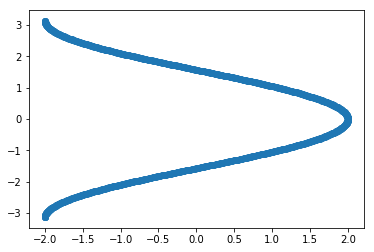

In [151]:
plt.scatter(r, phi)